## Banks Portfolio Optimization


In [1]:
# Import necessary libraries 
import pandas as pd 
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# Inputs - Choose stocks in your portfolio 
symbols = ["CBA.AX", "BAC", "WFC", "C"]

# Decide on time horizon 
end = "2023-03-03"
start = "2010-01-01"

In [3]:
# Fetch data from Yahoo finance using yfinance library
df = yf.download(symbols, start, end)["Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [4]:
# View the first 5 rows 
df.head()

,BAC,C,CBA.AX,WFC
Date,,,,
2010-01-04,13.080588,27.860685,27.287273,19.372585
2010-01-05,13.505773,28.925947,27.700033,19.904406
2010-01-06,13.664167,29.827320,27.839285,19.932772
2010-01-07,14.114359,29.909260,27.570726,20.656055
2010-01-08,13.989314,29.417603,27.928799,20.464590


In [5]:
# View the last 5 rows 
df.tail()

,BAC,C,CBA.AX,WFC
Date,,,,
2023-02-24,33.989548,50.180000,101.220001,46.619999
2023-02-27,33.989548,50.470001,101.389999,46.779999
2023-02-28,34.078968,50.689999,100.690002,46.770000
2023-03-01,33.919998,51.500000,99.050003,46.680000
2023-03-02,33.490002,51.400002,97.070000,45.799999


In [6]:
# Number of Years Invested
from dateutil import relativedelta as relativedelta

print("Number of Years Invested")
print("-" * 50)
d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
timedelta = relativedelta.relativedelta(d2, d1)
print("It has been %s years " % timedelta.years)

Number of Years Invested
--------------------------------------------------
It has been 13 years 


In [7]:
# Assign weights to each stock in the portfolio
weights = np.array([0.4, 0.3, 0.2, 0.1])

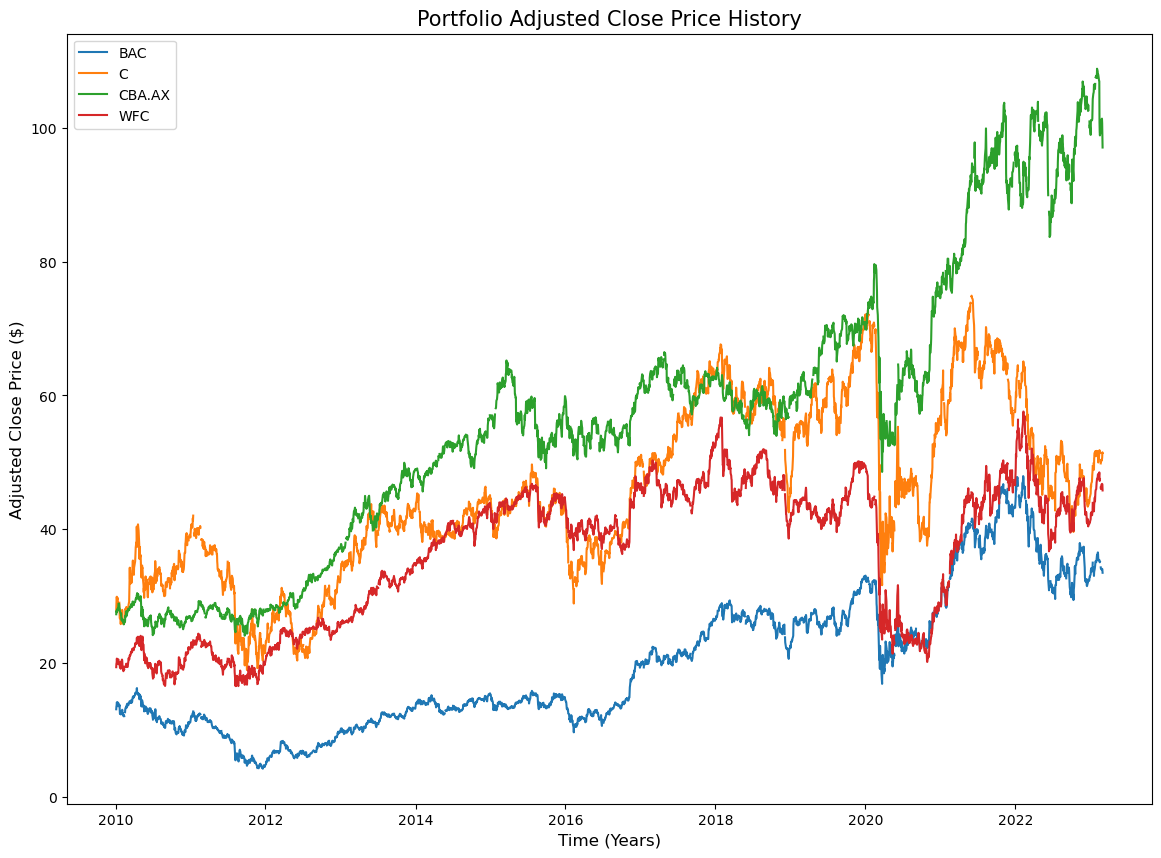

In [8]:
# Visualise the portfolio
plt.figure(figsize =(14, 10))

for column in df.columns.values:
    plt.plot(df[column], label=column)
plt.title("Portfolio Adjusted Close Price History", fontsize=15)
plt.xlabel("Time (Years)", fontsize=12)
plt.ylabel("Adjusted Close Price ($)", fontsize=12)
plt.legend(loc="upper left")
plt.show()

In [9]:
# Calculate daily simple returns 
returns = pd.DataFrame()
for symbol in symbols: 
    returns[symbol+ "-Return"] = (df[symbol]/df[symbol].shift(1) - 1).dropna()
returns.head()

,CBA.AX-Return,BAC-Return,WFC-Return,C-Return
Date,,,,
2010-01-05,0.015126,0.032505,0.027452,0.038235
2010-01-06,0.005027,0.011728,0.001425,0.031161
2010-01-07,-0.009647,0.032947,0.036286,0.002747
2010-01-08,0.012987,-0.008859,-0.009269,-0.016438
2010-01-11,0.007300,0.008939,-0.002079,0.011142


In [10]:
# Show Annualised Returns Covariance Matrix
covMatrix_annual = returns.cov() * 252
covMatrix_annual

,CBA.AX-Return,BAC-Return,WFC-Return,C-Return
CBA.AX-Return,0.041538,0.015923,0.013807,0.016993
BAC-Return,0.015923,0.120206,0.082758,0.102778
WFC-Return,0.013807,0.082758,0.090946,0.082439
C-Return,0.016993,0.102778,0.082439,0.121402


In [11]:
# Calculate Portfolio Variance 
PortfolioVariance = np.dot(weights.T, np.dot(weights, covMatrix_annual))
PortfolioVariance                                                                                        

0.0491017301110266

In [12]:
# Calculate Portfolio Volatility (Std Deviation)
PortfolioStdDev = np.sqrt(PortfolioVariance)
PortfolioStdDev

0.22158910196809453

In [13]:
# Calculate Portfolio Annual Return 
PortfolioAnnualReturn = np.sum(returns.mean() * weights) * 252
PortfolioAnnualReturn

0.14322394947698786

In [14]:
# Percentage Portfolio Expected Annual Return, Portfolio Variance and Portfolio Volatility(Risk)
print("Portfolio Properties")
print("-" * 33)
Percent_Return = str(round(PortfolioAnnualReturn , 2) * 100) + "%"
Percent_Variance = str(round(PortfolioVariance, 2) * 100) + "%"
Percent_Risk = str(round(PortfolioStdDev, 2) * 100) + "%"

print(f"Portfolio Expected Return:  {Percent_Return}")
print(f"Portfolio Variance(Spread): {Percent_Variance}")
print(f"Portfolio Volatility(Risk): {Percent_Risk}")

Portfolio Properties
---------------------------------
Portfolio Expected Return:  14.000000000000002%
Portfolio Variance(Spread): 5.0%
Portfolio Volatility(Risk): 22.0%


In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import expected_returns
from pypfopt import risk_models

In [16]:
# Portfolio Optimization 

In [17]:
# Calculate expected returns and annualised simple covariance 
mu = expected_returns.mean_historical_return(df)
mu

BAC       0.072208
C         0.046465
CBA.AX    0.098682
WFC       0.065890
dtype: float64

In [18]:
s = risk_models.sample_cov(df)   
s

,BAC,C,CBA.AX,WFC
BAC,0.116698,0.099935,0.014903,0.080303
C,0.099935,0.118340,0.015628,0.079776
CBA.AX,0.014903,0.015628,0.040960,0.012935
WFC,0.080303,0.079776,0.012935,0.088094


In [19]:
# Optimize for Max Sharpe Ratio (Measure Portfolio Performance against Investment that risk free (bonds, bills)
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('BAC', 0.05127), ('C', 0.0), ('CBA.AX', 0.87528), ('WFC', 0.07345)])
Expected annual return: 9.5%
Annual volatility: 18.9%
Sharpe Ratio: 0.40


(0.09491627709273293, 0.1891237510702573, 0.3961230499542196)

In [20]:
# Get the discrete allocation of shares per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights

discrete_allocation = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = discrete_allocation.lp_portfolio()
print(f"Discrete Allocation: {allocation}")
print("Remaining Funds:      ${:.2f}".format(leftover))

Discrete Allocation: {'BAC': 15, 'CBA.AX': 90, 'WFC': 16}
Remaining Funds:      $28.55


In [21]:
# Dates each bank had the Best and Worst Single Day's Returns
print("Best Day Returns")
print("_" * 26)
print(returns.idxmax())
print("\n")
print("Worst Day Returns")
print("_" * 26)
print(returns.idxmin())

Best Day Returns
__________________________
CBA.AX-Return   2020-03-17
BAC-Return      2020-03-13
WFC-Return      2020-03-24
C-Return        2020-03-13
dtype: datetime64[ns]


Worst Day Returns
__________________________
CBA.AX-Return   2020-03-16
BAC-Return      2011-08-08
WFC-Return      2020-03-12
C-Return        2020-03-16
dtype: datetime64[ns]


In [22]:
# Get hold of the Highest and Lowest Adjusted Prices
print("Highest Adjusted Close Price ($)")
print("-" * 32)
print(df.max())
print("\n")
print("Lowest Adjusted Close Price ($)")
print("-" * 32)
print(df.min())

Highest Adjusted Close Price ($)
--------------------------------
BAC        47.945427
C          74.917526
CBA.AX    108.850800
WFC        57.596664
dtype: float64


Lowest Adjusted Close Price ($)
--------------------------------
BAC        4.192453
C         18.946695
CBA.AX    24.083815
WFC       16.538507
dtype: float64


In [23]:
# Share of Capital Oultay per stock
Investment = 5000
print("Share of Investment per Stock")
print("_" * 28)
invest_weights = [0.3, 0.3, 0.2, 0.2]
for i , x in zip(df.columns, invest_weights):
    cost = x * Investment
    print("{} : ${}".format(i, cost))

Share of Investment per Stock
____________________________
BAC : $1500.0
C : $1500.0
CBA.AX : $1000.0
WFC : $1000.0


In [25]:
# Number of Shares 
Investment = 5000
print("Number of Shares per Stock in the Portfolio")
print("_" * 45)
invest_weights = [0.3, 0.3, 0.2, 0.2]
for i, x, y in zip(df.columns, invest_weights, df.iloc[0]):
    cost = x * Investment
    shares = int(cost/y)
    print("{}:{} shares".format(i, shares))

Number of Shares per Stock in the Portfolio
_____________________________________________
BAC:114 shares
C:53 shares
CBA.AX:36 shares
WFC:51 shares


In [26]:
# Beginning Value
Investment = 5000
print("Beginning Value of the Portfolio")
print("_" * 30)
invest_weights = [0.3, 0.3, 0.2, 0.2]
for i, x, y in zip(df.columns, invest_weights, df.iloc[0]):
    cost = x * Investment
    shares = int(cost/y)
    beginning_value = round(shares * y, 2)
    print("{} : ${}".format(i, beginning_value))

Beginning Value of the Portfolio
______________________________
BAC : $1491.19
C : $1476.62
CBA.AX : $982.34
WFC : $988.0


In [27]:
Investment = 5000
print("Current Value of the Portfolio")
print("_" * 30)
invest_weights = [0.3, 0.3, 0.2, 0.2]
for i, x, y, z in zip(df.columns, invest_weights, df.iloc[0], df.iloc[-1]):
    cost = x * Investment
    shares = int(cost/y)
    current_value = round(shares * z, 2)
    print("{} : ${}".format(i, current_value))

Current Value of the Portfolio
______________________________
BAC : $3817.86
C : $2724.2
CBA.AX : $3494.52
WFC : $2335.8


In [31]:
# Total Value of the Portfolio
result = []
#print("Total Value for the Portfolio")
#print("_" * 28)
invest_weights = [0.3, 0.3, 0.2, 0.2]
for i, x, y, z in zip(df.columns, invest_weights, df.iloc[0], df.iloc[-1]):
    cost = x * Investment
    shares = int(cost/y)
    current_value = round(shares * z, 2)
    result.append(current_value)
print("Total Value: $%s" % round(sum(result), 2))

Total Value: $12372.38
